# ROC 曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target == 9] = 1
y[digits.target != 9] = 0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.96111111111111114

In [6]:
from playML.metrics import FPR, TPR

decision_scores = log_reg.decision_function(X_test)

fprs = []
tprs = []
thresholds = np.linspace(decision_scores.min(), decision_scores.max(), 101)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype=int)
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

fprs = np.array(fprs)
tprs = np.array(tprs)

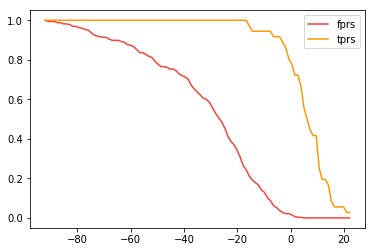

In [8]:
plt.plot(thresholds, fprs, color="#f44339", label="fprs")
plt.plot(thresholds, tprs, color="#ff9800", label="tprs")
plt.legend()
plt.show()

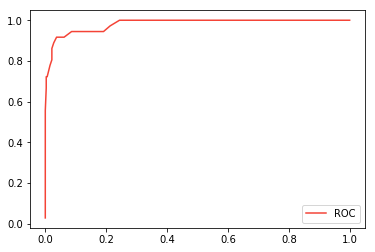

In [10]:
plt.plot(fprs, tprs, color="#f44336", label="ROC")
plt.legend()
plt.show()

#### scikit-learn中的ROC

In [11]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

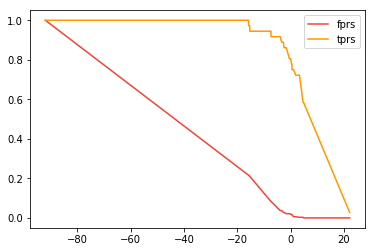

In [12]:
plt.plot(thresholds, fprs, color="#f44339", label="fprs")
plt.plot(thresholds, tprs, color="#ff9800", label="tprs")
plt.legend()
plt.show()

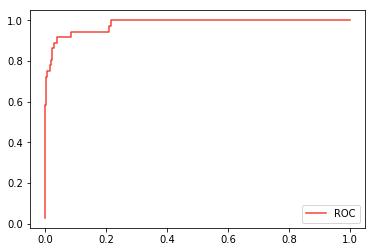

In [13]:
plt.plot(fprs, tprs, color="#f44336", label="ROC")
plt.legend()
plt.show()

#### ROC AUC

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_scores)

0.98131001371742121